In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

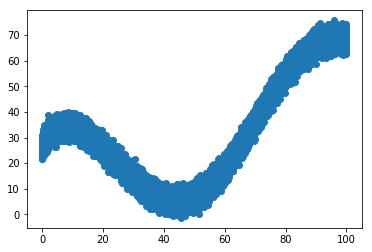

In [2]:

N = int(4e4)


x = np.linspace(0,100,N)

y = 25*np.cos(x/15) + (np.sqrt(20*x))+2*np.random.randn(N)



plt.scatter(x,y, alpha = 1)


In [3]:
def OLS(Y, Y_hat):
    return np.trace((Y - Y_hat).T.dot(Y - Y_hat))

def R2(Y, Y_hat):
    return 1 - ((Y - Y_hat)**2).sum(axis = 0) / ((Y - Y_hat.mean(axis = 0))**2).sum(axis = 0)

def sigmoid(H):
    return 1/(1+np.exp(-H))

def ReLU(H):
    return H*(H > 0)

def feed_forward (X, W1, b1,W2,b2):
    Z1 = np.tanh(np.matmul(X,W1) +b1)
    y_hat = np.matmul(Z1,W2)+b2
    return Z1,y_hat


In [4]:
X = x.reshape((N,1))
Y = y.reshape((N,1))

In [6]:
D = 1
M1 = 100
K = 1

W1_not = np.random.randn(D,M1)
b1_not = np.random.randn(M1)
W2_not = np.random.randn(M1,K)
b2_not = np.random.randn(K)


R squared w/ Nesterov Momentum: [0.00136219]


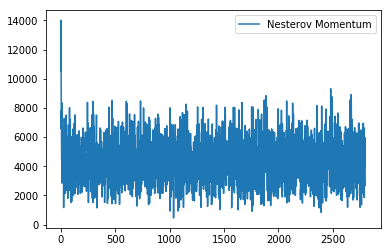

In [6]:
W1 = W1_not.copy()
b1 = b1_not.copy()
W2 = W2_not.copy()
b2 = b2_not.copy()

etas = []
J_n_m = []
eta = 3e-7
etanot = eta
mu = 0.9
k = 3e-12
index = 1

vW1 = 0
vb1 = 0
vW2 = 0
vb2 = 0
vW3 = 0
vb3 = 0
vW4 = 0
vb4 = 0

batch_sz = 10
n_batches = N//batch_sz

epochs = 70

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        eta =  eta*np.exp(-k*index) #update is here
        etas.append(eta)
        index += 1
        
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, Y_hat_b = feed_forward(X_b, W1, b1, W2, b2)
        J_n_m.append(OLS(Y_b,Y_hat_b))
        
        dH2 = Y_hat_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        vW2 = mu*vW2 - eta*dW2
        vb2 = mu*vb2 - eta*dH2.sum(axis = 0)
        W2 += mu*vW2 - eta*dW2
        b2 += mu*vb2 - eta*dH2.sum(axis = 0)
        
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 =  dZ1*(1-Z1_b**2)
        dW1 = np.matmul(X_b.T, dH1)
        vW1 = mu*vW1 - eta*dW1
        vb1 = mu*vb1 - eta*dH1.sum(axis = 0)
        W1 += mu*vW1 - eta*dW1
        b1 += mu*vb1 - eta*dH1.sum(axis = 0)
        
Y_hat = feed_forward(X, W1, b1, W2, b2)[-1]
print("R squared w/ Nesterov Momentum: {}".format(R2(Y,Y_hat)))

plt.plot(J_n_m[::100], label = "Nesterov Momentum")
plt.legend()

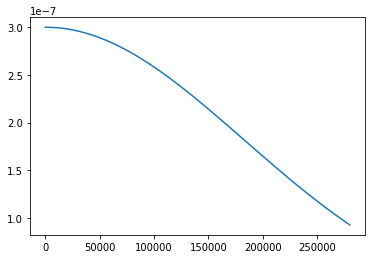

In [7]:
plt.plot(etas)

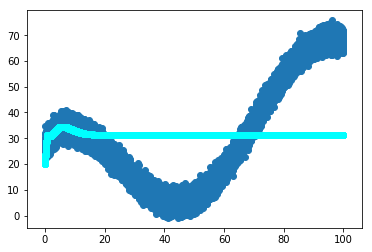

In [8]:
plt.scatter(X,Y)
plt.scatter(X,Y_hat, color = "#00FFFF", linewidth = 1)

R squared w/ ADA Grad [0.98962863]


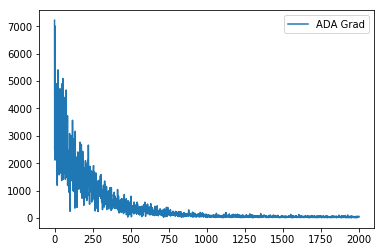

In [9]:
#ADA Grad

W1 = W1_not.copy()
b1 = b1_not.copy()
W2 = W2_not.copy()
b2 = b2_not.copy()


J_ada = []

eta = 1e-2
etanot = eta

mu = 0.9
k = 3e-11

index = 0
GW1 = 1
GW2 = 1
Gb1 = 1
Gb2 = 1

epsilon = 1e-10


batch_sz = 10
n_batches = N//batch_sz

epochs = 50

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, Y_hat_b = feed_forward(X_b, W1, b1, W2, b2)
        J_ada.append(OLS(Y_b,Y_hat_b))
        
        
        
        dH2 = Y_hat_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        db2 = dH2.sum(axis = 0)
        GW2 += dW2**2
        Gb2 += db2**2
        W2 -= (eta/np.sqrt(GW2+epsilon))*dW2
        b2 -= (eta/np.sqrt(Gb2+epsilon))*db2
        
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 =  dZ1*(1-Z1_b**2)
        dW1 = np.matmul(X_b.T, dH1)
        db1 = dH1.sum(axis = 0)
        GW1 += dW1**2
        Gb1 += db1**2
        W1 -= (eta/np.sqrt(GW1+epsilon))*dW1
        b1 -= (eta/np.sqrt(Gb1+epsilon))*db1
        
        etas.append(eta)
        index += 1
        
Y_hat = feed_forward(X, W1, b1, W2, b2)[-1]
print("R squared w/ ADA Grad {}".format(R2(Y,Y_hat)))

plt.plot(J_ada[::100], label = "ADA Grad")
plt.legend()

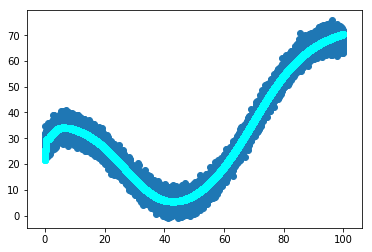

In [10]:
plt.scatter(X,Y)
plt.scatter(X,Y_hat, color = "#00FFFF", linewidth = 1)

R squared w/ RMS Prop: [0.95511035]


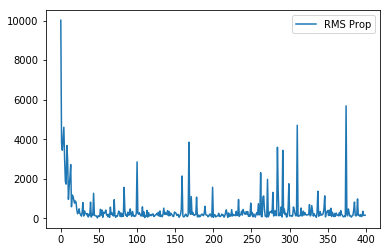

In [17]:
#RMS Prop

W1 = W1_not.copy()
b1 = b1_not.copy()
W2 = W2_not.copy()
b2 = b2_not.copy()


J_rms_prop = []

eta = 1e-2
etanot = eta

mu = 0.9
k = 3e-11

index = 0
GW1 = 1
GW2 = 1
Gb1 = 1
Gb2 = 1
gamma = .99

epsilon = 1e-10


batch_sz = 10
n_batches = N//batch_sz

epochs = 10

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, Y_hat_b = feed_forward(X_b, W1, b1, W2, b2)
        J_rms_prop.append(OLS(Y_b,Y_hat_b))
        
        
        
        dH2 = Y_hat_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        db2 = dH2.sum(axis = 0)
        GW2 = GW2 *gamma+ (1-gamma) *dW2**2
        Gb2 = Gb2 *gamma+ (1-gamma) *db2**2
        W2 -= (eta/np.sqrt(GW2+epsilon))*dW2
        b2 -= (eta/np.sqrt(Gb2+epsilon))*db2
        
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 =  dZ1*(1-Z1_b**2)
        dW1 = np.matmul(X_b.T, dH1)
        db1 = dH1.sum(axis = 0)
        GW1 = GW1 *gamma+ (1-gamma)*dW1**2
        Gb1 = Gb1 *gamma+ (1-gamma)*db1**2
        W1 -= (eta/np.sqrt(GW1+epsilon))*dW1
        b1 -= (eta/np.sqrt(Gb1+epsilon))*db1
        
        etas.append(eta)
        index += 1
        
Y_hat = feed_forward(X, W1, b1, W2, b2)[-1]
print("R squared w/ RMS Prop: {}".format(R2(Y,Y_hat)))

plt.plot(J_rms_prop[::100], label = "RMS Prop")
plt.legend()

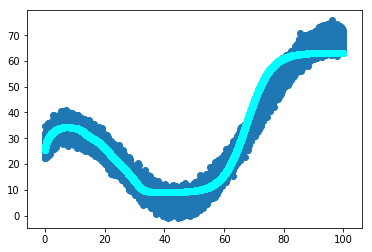

In [18]:
plt.scatter(X,Y)
plt.scatter(X,Y_hat, color = "#00FFFF", linewidth = 1)

R squared w/ ADAM [0.99001537]


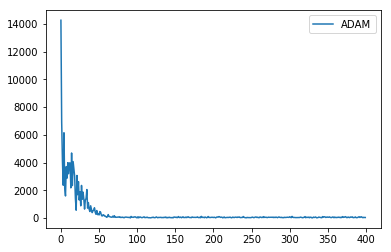

In [30]:
#ADAM

W1 = W1_not.copy()
b1 = b1_not.copy()
W2 = W2_not.copy()
b2 = b2_not.copy()


J_adam = []

eta = 1e-3

mu = 0.9
k = 3e-11

index = 1
M1 = 0
M2 = 0
Mb1 = 0
Mb2 = 0

v1 = 0
v2 = 0

v1b = 0
v2b = 0
gamma = .999



epsilon = 1e-10


batch_sz = 10
n_batches = N//batch_sz

epochs = 10

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, Y_hat_b = feed_forward(X_b, W1, b1, W2, b2)
        J_adam.append(OLS(Y_b,Y_hat_b))
        
        
        dH2 = Y_hat_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        db2 = dH2.sum(axis = 0)
        M2 = mu * M2+(1-mu)* dW2
        M2_hat = M2/(1-mu**(index))
        Mb2 = mu * Mb2+(1-mu)* db2
        Mb2_hat = Mb2/(1-(mu**index))
        v2 = gamma* v2 +(1-gamma)*(dW2**2) 
        v2b = gamma* v2b +(1-gamma)*(db2**2) 
        v2_hat = v2/(1-gamma**index)
        v2b_hat = v2b/(1-gamma**index)
        W2 -= (eta/(np.sqrt(v2_hat+epsilon))*M2_hat)
        b2 -= (eta/(np.sqrt(v2b_hat+epsilon))*Mb2_hat)
        
    
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 =  dZ1*(1-Z1_b**2)
        dW1 = np.matmul(X_b.T, dH1)
        db1 = dH1.sum(axis = 0)
        M1 =mu * M1+(1-mu)* dW1
        M1_hat = M1/(1-mu**(index))
        Mb1 = mu * Mb1+(1-mu)* db1
        Mb1_hat = Mb1/(1-mu**(index))
        v1 = gamma* v1 +(1-gamma)*(dW1**2)
        v1b = gamma* v1b +(1-gamma)*(db1**2)
        v1_hat = v1/(1-gamma**index)
        v1b_hat = v1b/(1-gamma**index)
        W1 -= (eta/(np.sqrt(v1_hat+epsilon))*M1_hat)
        b1 -= (eta/(np.sqrt(v1b_hat+epsilon))*Mb1_hat)
        
        index += 1
        
Y_hat = feed_forward(X, W1, b1, W2, b2)[-1]
print("R squared w/ ADAM {}".format(R2(Y,Y_hat)))

plt.plot(J_adam[::100], label = "ADAM")
plt.legend()

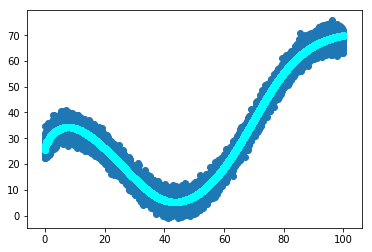

In [31]:
plt.scatter(X,Y)
plt.scatter(X,Y_hat, color = "#00FFFF", linewidth = 1)

R squared w/ RMS Prop and N Momentum: [0.98294829]


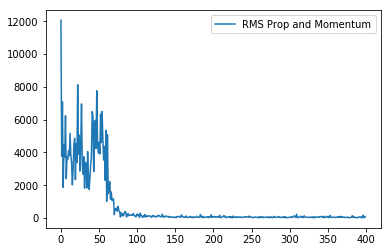

In [32]:
#RMS Prop w/ N momentum

W1 = W1_not.copy()
b1 = b1_not.copy()
W2 = W2_not.copy()
b2 = b2_not.copy()


J_rms_prop_NMomentum = []

eta = 1e-3
etanot = eta

mu = 0.9

index = 1
GW1 = 1
GW2 = 1
Gb1 = 1
Gb2 = 1
gamma = .99


vW1 = 0
vW2 = 0

vb1 = 0
vb1 = 0
gamma = .999

epsilon = 1e-10


batch_sz = 10
n_batches = N//batch_sz

epochs = 10

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        Z1_b, Y_hat_b = feed_forward(X_b, W1, b1, W2, b2)
        J_rms_prop_NMomentum.append(OLS(Y_b,Y_hat_b))
        
        
        
        dH2 = Y_hat_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        db2 = dH2.sum(axis = 0)
        GW2 = GW2 *gamma+ (1-gamma) *(dW2**2)
        Gb2 = Gb2 *gamma+ (1-gamma) *(db2**2)
        vW2 = mu *vW2 - (eta/ np.sqrt(GW2 + epsilon))*dW2
        vb2 = mu *vb2 - (eta/ np.sqrt(Gb2 + epsilon))*db2
        W2 +=  mu *vW2 - (eta/ np.sqrt(GW2 + epsilon))*dW2
        b2 +=  mu *vb2 - (eta/ np.sqrt(Gb2 + epsilon))*db2
        
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 =  dZ1*(1-Z1_b**2)
        dW1 = np.matmul(X_b.T, dH1)
        db1 = dH1.sum(axis = 0)
        GW1 = GW1 *gamma+ (1-gamma)*(dW1**2)
        Gb1 = Gb1 *gamma+ (1-gamma)*(db1**2)
        vW1 = mu *vW1 - (eta/ np.sqrt(GW1 + epsilon))*dW1
        vb1 = mu *vb1 - (eta/ np.sqrt(Gb1 + epsilon))*db1
        W1 +=  mu *vW1 - (eta/ np.sqrt(GW1 + epsilon))*dW1
        b1 +=  mu *vb1 - (eta/ np.sqrt(Gb1 + epsilon))*db1
        
        index += 1
        
Y_hat = feed_forward(X, W1, b1, W2, b2)[-1]
print("R squared w/ RMS Prop and N Momentum: {}".format(R2(Y,Y_hat)))

plt.plot(J_rms_prop_NMomentum[::100], label = "RMS Prop and Momentum")
plt.legend()

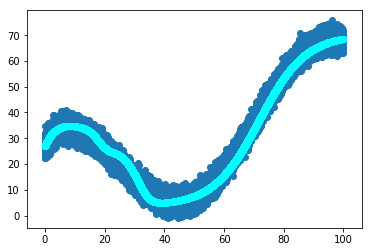

In [33]:
plt.scatter(X,Y)
plt.scatter(X,Y_hat, color = "#00FFFF", linewidth = 1)

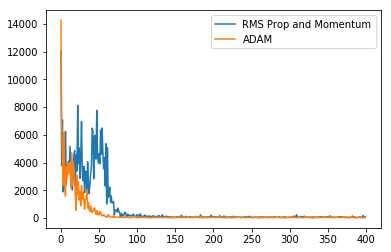

In [34]:
plt.plot(J_rms_prop_NMomentum[::100], label = "RMS Prop and Momentum")
plt.plot(J_adam[::100], label = "ADAM")
plt.legend()